# Practicing SVM with IRIS Flower Dataset

#### Daniel Neamati (5 July 2019)

In [1]:
# Import Statements

# Data Handling
import numpy as np
import pandas as pd

# Machine Learning
from sklearn import preprocessing, model_selection, svm
from sklearn import datasets

# Plotting
%matplotlib inline

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [2]:
# Load Example Data from SKLearn
flowers = datasets.load_iris()
print(flowers.feature_names)
df = pd.DataFrame(np.concatenate(
                    (flowers.data, np.transpose([flowers.target])), 
                axis = 1))
df.columns = flowers.feature_names + ['species']

df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


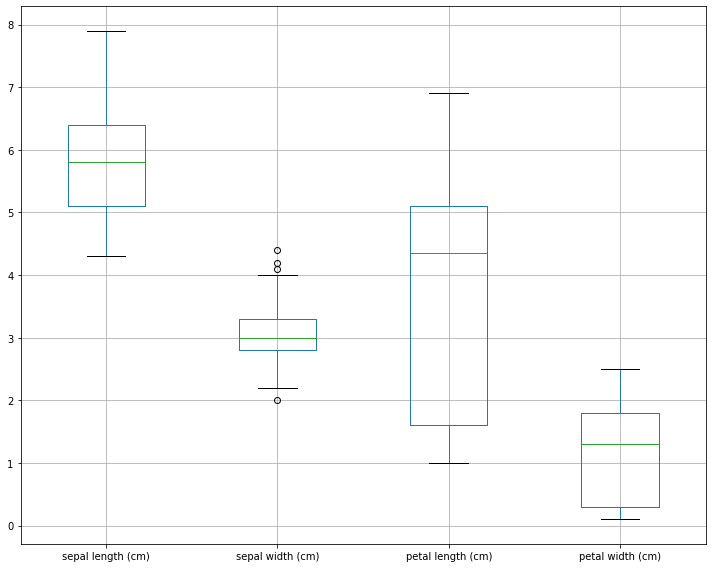

In [3]:
df.boxplot(column = [df.columns[i] for i in range(len(df.columns) - 1)], figsize = (10, 8))
plt.tight_layout()
plt.show()

## Visualize any two components

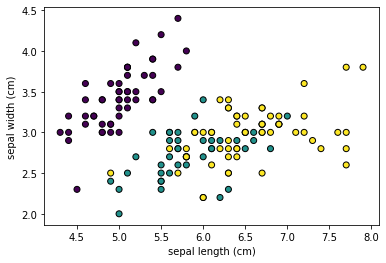

In [7]:
x_coord = df.columns[0]
y_coord = df.columns[1]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

## First, we train and visualize an SVM using 2 Components

0.8


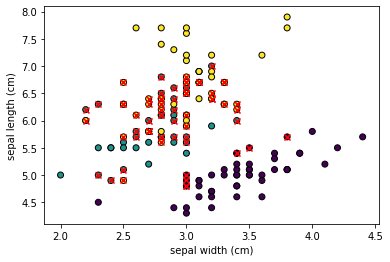

In [5]:
# Separate Features (X) from Labels (y)
# X = flowers.data
# y = flowers.target

cols = df.columns

x1_index = 1
x2_index = 0

X = pd.concat([df.loc[:, cols[x1_index]], df.loc[:, cols[x2_index]]], axis=1)
y = df.loc[:, 'species']

percent_split = 0.2
X_train, X_test, y_train, y_test = model_selection.\
                    train_test_split(X, y, test_size = percent_split)
    
# Now we choose the SVM Classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Now we compare the score
accuracy = clf.score(X_test, y_test)
print(accuracy)


# Now we want to visualize the support vectors
x_coord = df.columns[x1_index]
y_coord = df.columns[x2_index]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.scatter(clf.support_vectors_[:, 0], \
            clf.support_vectors_[:, 1], \
            c = 'r', marker = 'x')
plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

### Now we want to see how SVC Split the variable space by species

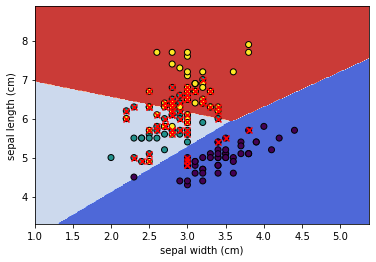

In [8]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

X1, X2 = X.loc[:, cols[x1_index]], X.loc[:, cols[x2_index]]
xx, yy = make_meshgrid(X1, X2)

# Now we want to see where new data would be predicted to fall
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
out = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)

# Now we want to visualize the support vectors
x_index = x1_index
y_index = x2_index

x_coord = df.columns[x_index]
y_coord = df.columns[y_index]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.scatter(clf.support_vectors_[:, 0], \
            clf.support_vectors_[:, 1], \
            c = 'r', marker = 'x')
plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

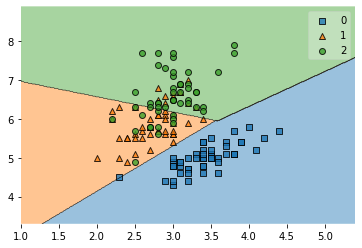

In [9]:
y_arr = np.array(y)

plot_decision_regions(X = np.array(X), y = y_arr.astype(int), clf=clf)

## It is critical that we can recover the coefficient of the SVC

[[ 2.26469597 -1.94118804]
 [ 1.73584754 -1.92453362]
 [-0.61744257 -1.5677751 ]]
[ 3.49714596  5.22267268 11.54165223]


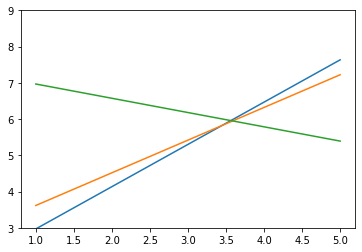

In [10]:
print(clf.coef_)
print(clf.intercept_)

for coef, intcp in zip(clf.coef_, clf.intercept_):
    x_plot_range = np.array(range(1, 6))
    y_plot = -coef[0]/coef[1] * x_plot_range - intcp / coef[1]
    plt.plot(x_plot_range, y_plot)

plt.ylim(3, 9)
plt.show()

## We can do the above with Linear SVC as well

0.8
[(array([ 2.26469597, -1.94118804]), 3.4971459615271776), (array([ 1.73584754, -1.92453362]), 5.222672681072117), (array([-0.61744257, -1.5677751 ]), 11.54165222577882)]


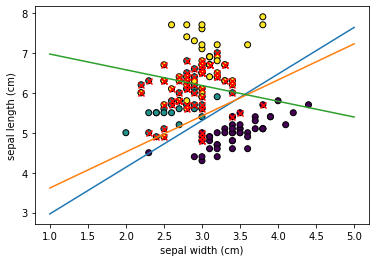

In [11]:
# Now we choose the SVM Classifier
clf_LSVC = svm.SVC(kernel='linear')
clf_LSVC.fit(X_train, y_train)

# Now we compare the score
accuracy = clf_LSVC.score(X_test, y_test)
print(accuracy)


# Now we want to visualize the support vectors
x_coord = df.columns[x1_index]
y_coord = df.columns[x2_index]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.scatter(clf_LSVC.support_vectors_[:, 0], \
            clf_LSVC.support_vectors_[:, 1], \
            c = 'r', marker = 'x')

print(list(zip(clf_LSVC.coef_, clf_LSVC.intercept_)))

xVals = np.linspace(1, 5)
for coef, intercept in zip(clf_LSVC.coef_, clf_LSVC.intercept_):
    # The Linear SVC has plane equations:
    # y = -(coef_0 / coef_1) x - intercept/coef_1
    # Where the coef_0 is the slope and the coef_1 is the negative of the scalling
    # See Stack Overflow "How can I know how to interpret the output coefficients
    # from the model sklearn.svm.LinearSVC()?"
    plt.plot(xVals, -(xVals * coef[0] + intercept) / coef[1])


plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

# Now we want to consider all of the features

1.0


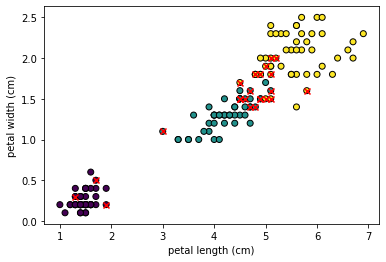

In [12]:
# Separate Features (X) from Labels (y)
X_all = flowers.data
y_all = flowers.target

percent_split = 0.2
X_train, X_test, y_train, y_test = model_selection.\
                    train_test_split(X_all, y_all, test_size = percent_split)
    
# Now we choose the SVM Classifier
clf_all = svm.SVC(kernel='linear')
clf_all.fit(X_train, y_train)

# Now we compare the score
accuracy = clf_all.score(X_test, y_test)
print(accuracy)


# Now we want to visualize the support vectors
x_index = 2
y_index = 3

x_coord = df.columns[x_index]
y_coord = df.columns[y_index]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.scatter(clf_all.support_vectors_[:, x_index], \
            clf_all.support_vectors_[:, y_index], \
            c = 'r', marker = 'x')
plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

## It is critical that we can recover the coefficient of the SVC

In [13]:
print(clf_all.coef_)

[[-0.04619348  0.52133922 -1.00307924 -0.4641441 ]
 [-0.00708258  0.17885072 -0.53832399 -0.29218158]
 [ 0.59195016  0.96022667 -2.00674957 -1.97600893]]


### Now we try a more complicated visualization project

We first simply set one parameter to it's mean and the other to zero.
After we will take various slices of the data

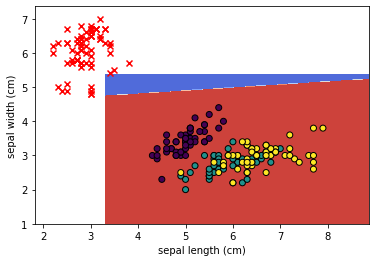

In [14]:
X0, X1 = X_all[:, 0], X_all[:, 1]
xx, yy = make_meshgrid(X0, X1)

zz = np.ones_like(xx) * np.mean(X_all[:, 2])
aa = np.zeros_like(xx)

# Now we want to see where new data would be predicted to fall
Z = clf_all.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel(), aa.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)

# Now we want to visualize the support vectors
x_index = 0
y_index = 1

x_coord = df.columns[x_index]
y_coord = df.columns[y_index]

plt.scatter(df[x_coord], df[y_coord], \
            c = df['species'], edgecolors = 'k')
plt.scatter(clf.support_vectors_[:, x_index], \
            clf.support_vectors_[:, y_index], \
            c = 'r', marker = 'x')
plt.xlabel(x_coord)
plt.ylabel(y_coord)
plt.show()

Plane of  2.0 1.0


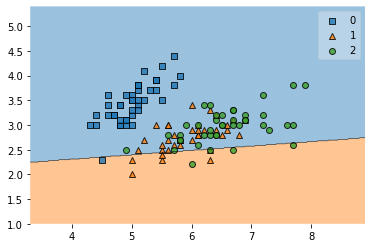

Plane of  2.0 1.3333333333333333


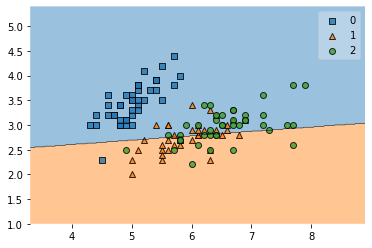

Plane of  2.0 1.6666666666666665


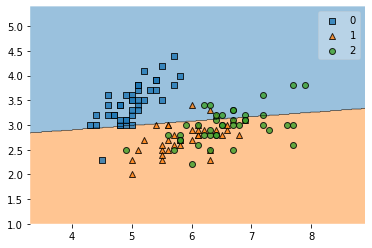

Plane of  2.0 2.0


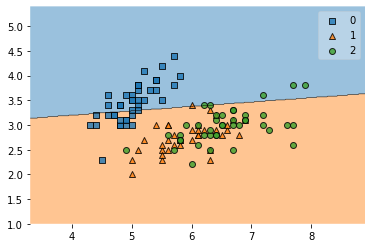

Plane of  2.0 2.333333333333333


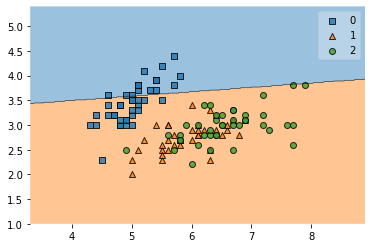

Plane of  2.0 2.6666666666666665


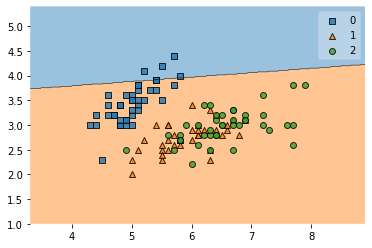

Plane of  2.0 3.0


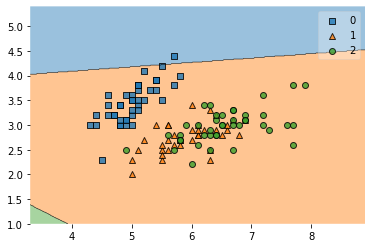

Plane of  2.0 3.333333333333333


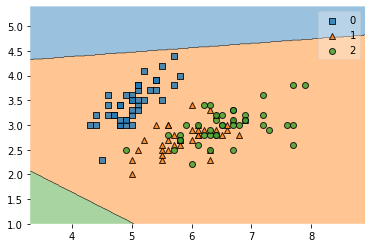

Plane of  2.0 3.6666666666666665


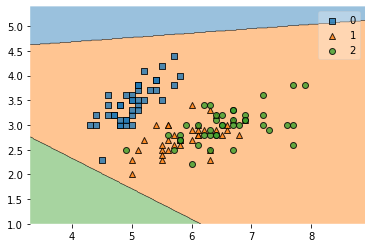

Plane of  2.0 4.0


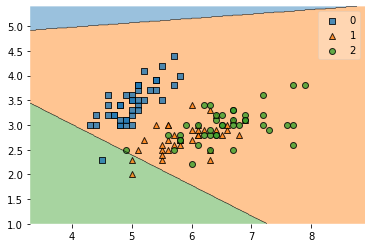

Plane of  2.25 1.0


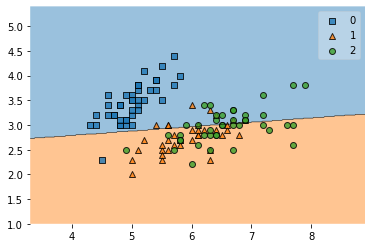

Plane of  2.25 1.3333333333333333


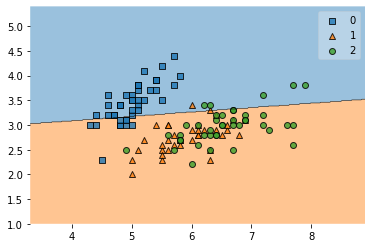

Plane of  2.25 1.6666666666666665


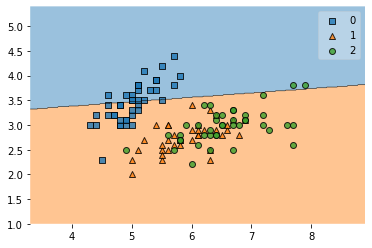

Plane of  2.25 2.0


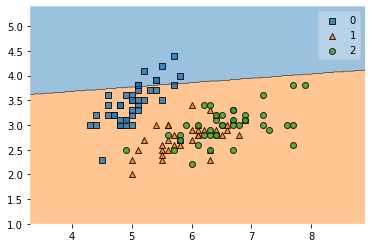

Plane of  2.25 2.333333333333333


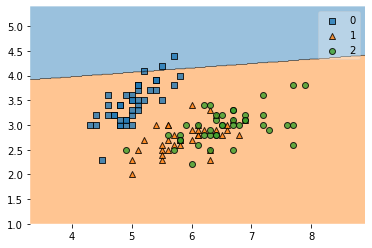

Plane of  2.25 2.6666666666666665


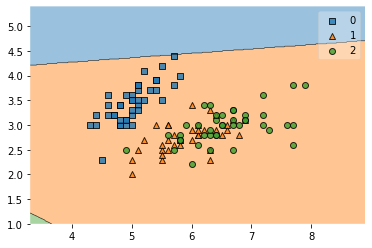

Plane of  2.25 3.0


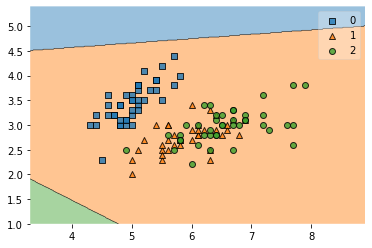

Plane of  2.25 3.333333333333333


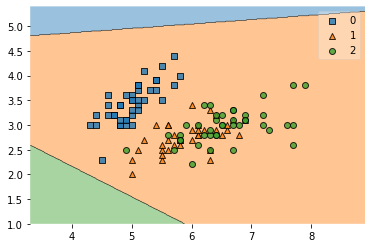

Plane of  2.25 3.6666666666666665


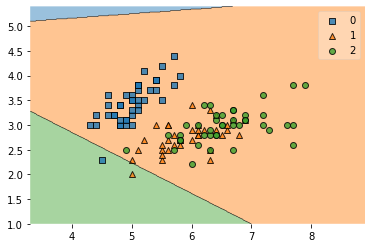

Plane of  2.25 4.0


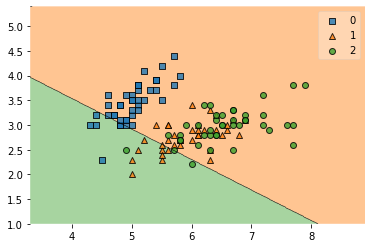

Plane of  2.5 1.0


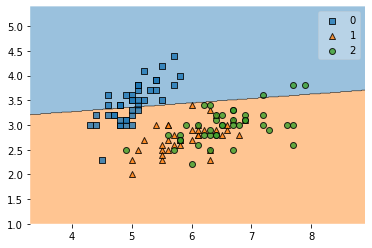

Plane of  2.5 1.3333333333333333


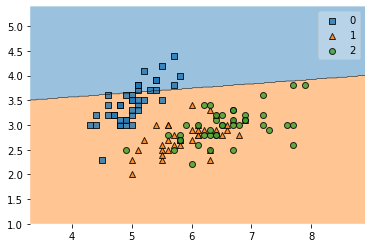

Plane of  2.5 1.6666666666666665


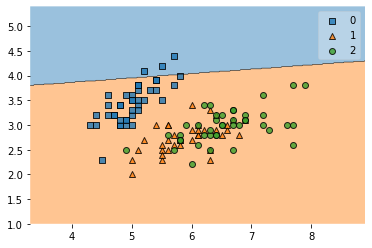

Plane of  2.5 2.0


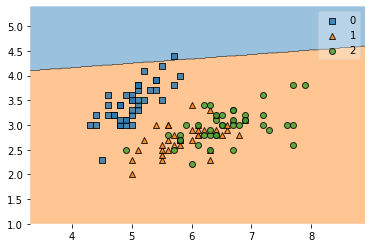

Plane of  2.5 2.333333333333333


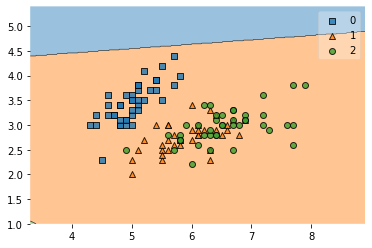

Plane of  2.5 2.6666666666666665


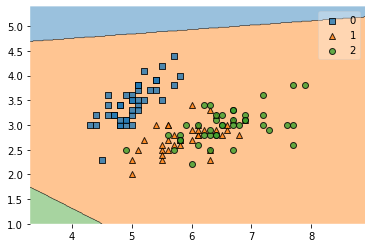

Plane of  2.5 3.0


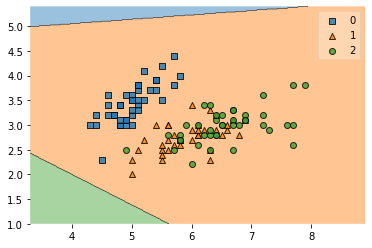

Plane of  2.5 3.333333333333333


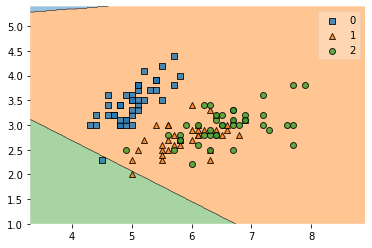

Plane of  2.5 3.6666666666666665


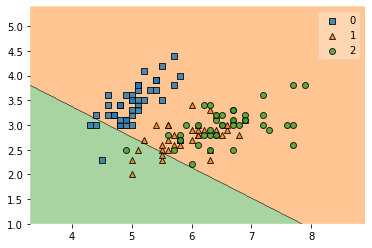

Plane of  2.5 4.0


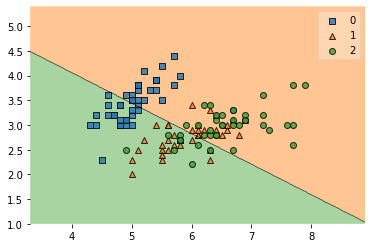

Plane of  2.75 1.0


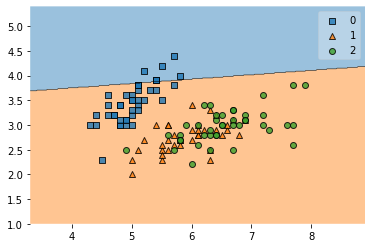

Plane of  2.75 1.3333333333333333


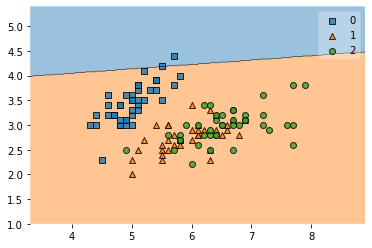

Plane of  2.75 1.6666666666666665


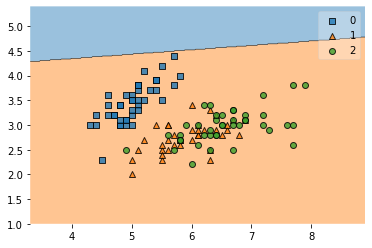

Plane of  2.75 2.0


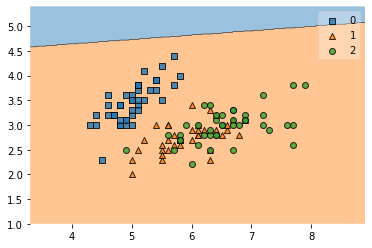

Plane of  2.75 2.333333333333333


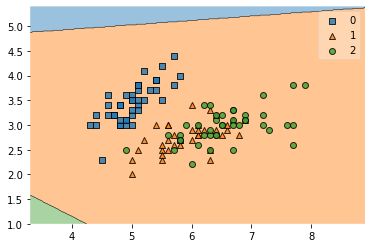

Plane of  2.75 2.6666666666666665


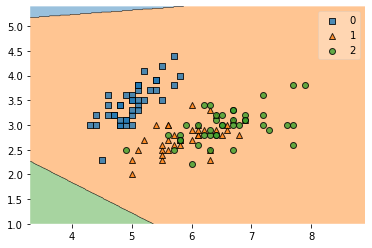

Plane of  2.75 3.0


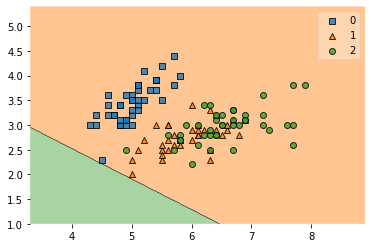

Plane of  2.75 3.333333333333333


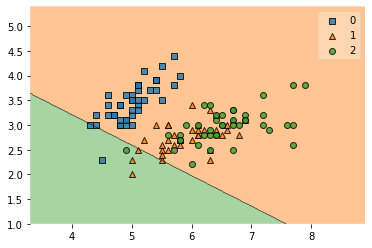

Plane of  2.75 3.6666666666666665


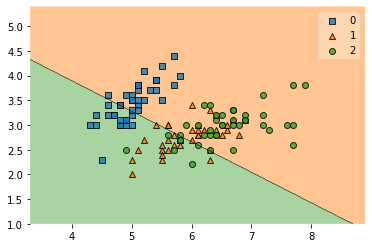

Plane of  2.75 4.0


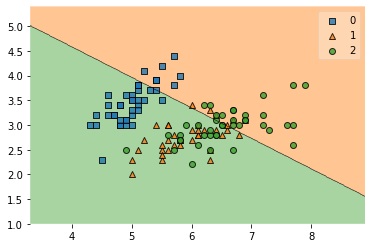

Plane of  3.0 1.0


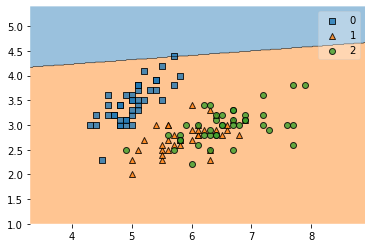

Plane of  3.0 1.3333333333333333


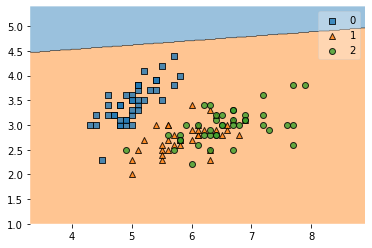

Plane of  3.0 1.6666666666666665


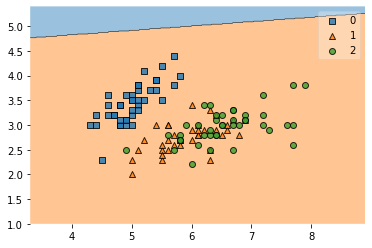

Plane of  3.0 2.0


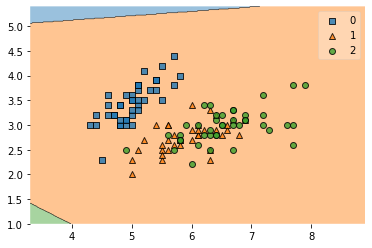

Plane of  3.0 2.333333333333333


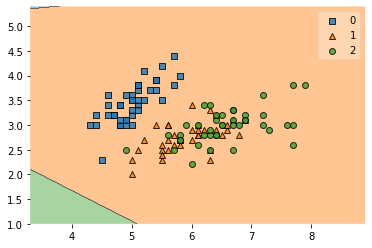

Plane of  3.0 2.6666666666666665


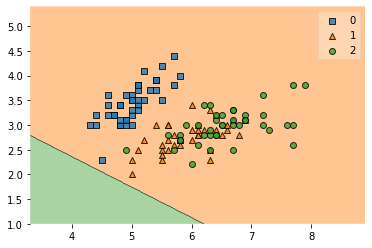

Plane of  3.0 3.0


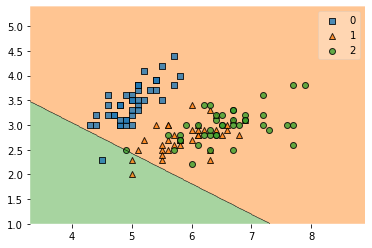

Plane of  3.0 3.333333333333333


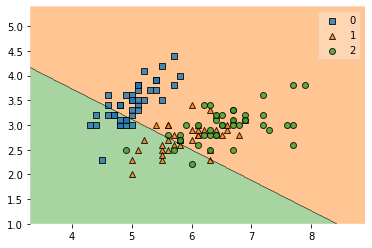

Plane of  3.0 3.6666666666666665


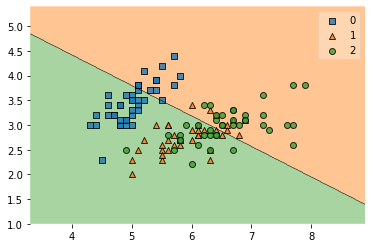

Plane of  3.0 4.0


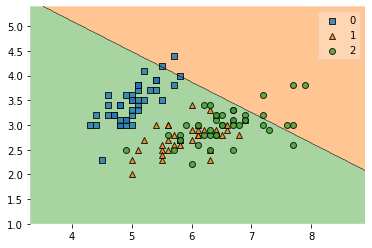

In [15]:
for v1 in np.linspace(2, 3, 5):
    for v2 in np.linspace(1, 4, 10):
        width = 10

        print("Plane of ", v1, v2)
        plot_decision_regions(X_train, y_train, clf=clf_all,
              feature_index=[0,1],                         #these one will be plotted  
              filler_feature_values={2: v1, 3: v2},  #these will be ignored
              filler_feature_ranges={2: width, 3: width})
        plt.show()

In [ ]:
np.linspace(2, 3, 10)